In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
plt.rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"
plt.rcParams['font.family'] = 'monospace'
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline
import pickle
import matplotlib.image as mpimg
from matplotlib.lines import Line2D

________________
## Function for making the plots

In [2]:
def TErr(err=[]):
    return np.sqrt(np.sum([x**2 for x in err]))

def formatter(data):
    y = [elem[0] for elem in data]
    yerr = [elem[1] for elem in data]
    x = [(elem[2] + elem[3])/2 for elem in data]
    xerr = [(elem[3] - elem[2])/2 for elem in data]
    
    return x, y, xerr, yerr

def placeLogo(bottom, left):
    # add the logo
    plt3 = plt.twinx()
    plt3.axis('off')
    plt3.set_ylim(bottom=0, top=1)
    logo = mpimg.imread('../../plots/logo/HEPfit-logo.png')
    size = 0.5
    bottom = bottom
    top = bottom + size
    left = left
    right = left + size*2.3398
    extent = (left, right, bottom, top)
    imgplot = plt.imshow(logo, extent=extent, alpha=0.85)

__________________________
## Experimental Data

In [3]:
# Experimental Data

### arXiv:1612.05014
P5p_BELLE = [[0.42, 0.414367, 0.1, 4.], [-0.025, 0.318002, 4., 8.]]

### CMS-PAS-BPH-15-008
P5p_CMS = [[0.105, 0.33708, 1., 2.], [-0.555, 0.35795, 2., 4.3],
           [-0.955, 0.268, 4.3, 6.], [-0.66, 0.22023, 6., 8.68]]

### arXiv:1805.04000
P5p_ATLAS = [[0.67, TErr([0.26, 0.16]), 0.04, 2.], [-0.33, TErr([0.31, 0.13]), 2., 4.],
             [0.26, TErr([0.35, 0.18]), 4., 6.]]

### arXiv:2003.04831
P5p_LHCb = [[0.521, TErr([0.095, 0.024]), 0.10, 0.98], [0.365, TErr([0.122, 0.013]), 1.1, 2.5],
            [-0.150, TErr([0.144, 0.032]), 2.5, 4.], [-0.439, TErr([0.111, 0.036]), 4., 6.],
            [-0.583, TErr([0.090, 0.030]), 6., 8.]]

data_d = {}
data_d['Belle'] = P5p_BELLE
data_d['CMS'] = P5p_CMS
data_d['ATLAS'] = P5p_ATLAS
data_d['LHCb'] = P5p_LHCb

__________________
## Dump data for $P_5^\prime$

__NOTE:__ Do not run this unless you have the data. You can load data below.

In [5]:
# set dump to True to dump data
dump = False

if dump:
    FDD_path = '../../../TheNewHope/PSR3/SM/FDD/SM/p5p.txt'
    PDD_path = '../../../TheNewHope/PSR3/SM/PDD/SM/p5p.txt'
    PMD_path = '../../../TheNewHope/PSR3/SM/PMD/SM/p5p.txt'

    LHCb_bins = [[x[2], x[3]] for x in P5p_LHCb]
    
    # data for P5p FDD
    P5p_FDD = pd.read_csv(FDD_path, header=None)
    P5p_FDD.columns = ['mean', 'sd']
    P5p_FDD['upper'] = P5p_FDD['mean'] + P5p_FDD['sd']
    P5p_FDD['lower'] = P5p_FDD['mean'] - P5p_FDD['sd']
    P5p_FDD['bins'] = LHCb_bins
    
    # data for P5p PDD
    P5p_PDD = pd.read_csv(PDD_path, header=None)
    P5p_PDD.columns = ['mean', 'sd']
    P5p_PDD['upper'] = P5p_PDD['mean'] + P5p_PDD['sd']
    P5p_PDD['lower'] = P5p_PDD['mean'] - P5p_PDD['sd']
    P5p_PDD['bins'] = LHCb_bins

    # data for P5p PMD
    P5p_PMD = pd.read_csv(PMD_path, header=None)
    P5p_PMD.columns = ['mean', 'sd']
    P5p_PMD['upper'] = P5p_PMD['mean'] + P5p_PMD['sd']
    P5p_PMD['lower'] = P5p_PMD['mean'] - P5p_PMD['sd']
    P5p_PMD['bins'] = LHCb_bins
    
    
    data = {}
    data['FDD'] = P5p_FDD
    data['PDD'] = P5p_PDD
    data['PMD'] = P5p_PMD
    
    with open('../../data/bsll_2021/P5p_SM.data', 'wb') as f:
        pickle.dump(data, f)

______________
## Load Data 

In [4]:
with open('../../data/bsll_2021/P5p_SM.data', 'rb') as f:
    data = pickle.load(f)

______________________
## $P_5^\prime$ plot

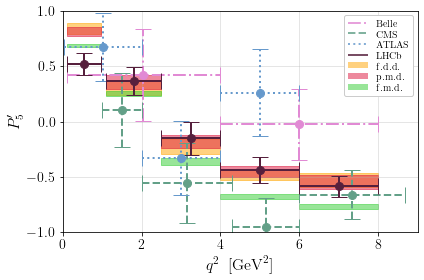

In [6]:
plt.figure(figsize=(6,4))

colors = ['#E18AD4', '#63a088', '#6699CC', '#56203d']
style = ['dashdot', '--', ':', '-']
bands = ['orange', 'crimson', 'limegreen']

for i, had in enumerate(['FDD', 'PDD', 'PMD']):
    for row in data[had].iterrows():
        item = row[1]
        plt.fill_between(item['bins'], [item.upper, item.upper], [item.lower, item.lower], alpha=0.5, color=bands[i])

for i, key in enumerate(['Belle', 'CMS', 'ATLAS', 'LHCb']):
    x, y, xerr, yerr = formatter(data_d[key])
    eb = plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o', color=colors[i], ecolor=colors[i], elinewidth=2, capsize=8, markersize=8)
    eb[-1][0].set_linestyle(style[i])
    eb[-1][1].set_linestyle(style[i])
    
# settings for the plot
plt.xlim(0,9)
plt.ylim(-1.,1.)
plt.grid(':', alpha=0.4)
plt.xlabel(r'$q^2\ [\rm{GeV}^2]$', fontsize=16)
plt.ylabel(r'$P_5^\prime$', fontsize=16)
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=14)

# add the logo
# placeLogo(2.5, 3.8)
    
# make the legend
size = 10
line0 = Line2D([0], [0], color=colors[0], linewidth=2, linestyle=style[0], solid_capstyle='butt', alpha=0.8)
line1 = Line2D([0], [0], color=colors[1], linewidth=2, linestyle=style[1], solid_capstyle='butt', alpha=0.8)
line2 = Line2D([0], [0], color=colors[2], linewidth=2, linestyle=style[2], solid_capstyle='butt', alpha=0.8)
line3 = Line2D([0], [0], color=colors[3], linewidth=2, linestyle=style[3], solid_capstyle='butt', alpha=0.8)
line4 = Line2D([0], [0], color=bands[0], linewidth=6, linestyle='-', solid_capstyle='butt', alpha=0.5)
line5 = Line2D([0], [0], color=bands[1], linewidth=6, linestyle='-', solid_capstyle='butt', alpha=0.5)
line6 = Line2D([0], [0], color=bands[2], linewidth=6, linestyle='-', solid_capstyle='butt', alpha=0.5)
labels = [r'$\rm{Belle}$', r'$\rm{CMS}$', r'$\rm{ATLAS}$', r'$\rm{LHCb}$', r'$\rm{f.d.d.}$', r'$\rm{p.m.d.}$', r'$\rm{f.m.d.}$']
leg = plt.figlegend(handles=[line0, line1, line2, line3, line4, line5, line6], labels=labels, handlelength=2., labelspacing=0.15, bbox_to_anchor=[0.975, 0.95],
                loc='upper right', prop={'size': size}, ncol=1, fancybox=True, framealpha=1, columnspacing=1)
    
plt.tight_layout()
plt.savefig('../../plots/bsll_2021/P5p.pdf', dpi=300)
plt.show()